<a href="https://colab.research.google.com/github/yasminadelia/DataScienceProject/blob/master/Spotify_Song_Analysis_and_Recommendator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [141]:
data_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spotify analysis/data.csv")
data_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


In [142]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

## Preprocessing

In [143]:
import re

# remove square bracket and quotation marks from artist name
data_df['artists'] = data_df['artists'].apply(lambda x: re.sub(r'[\["\'\]]', '',x))

In [144]:
data_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,Screamin Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"DJ Combo, Sander-7, Tony T",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,Alessia Cara,0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,Roger Fly,0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,Taylor Swift,0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


change release_date data type to datetime


In [145]:
data_df['release_date'] = pd.to_datetime(data_df['release_date'])
data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920-01-01,0.0936,149.976,0.6340,1920
1,0.643000,Screamin Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920-01-01,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [146]:
data_df.shape

(174389, 19)

check if data has missing value

In [147]:
data_df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [148]:
data_df.dtypes

acousticness               float64
artists                     object
danceability               float64
duration_ms                  int64
energy                     float64
explicit                     int64
id                          object
instrumentalness           float64
key                          int64
liveness                   float64
loudness                   float64
mode                         int64
name                        object
popularity                   int64
release_date        datetime64[ns]
speechiness                float64
tempo                      float64
valence                    float64
year                         int64
dtype: object

## Exploratory Data Analysis

Create dataframe for visualizing correlation by dropping non-numeric columns (id, name, artist, release_date and year).

In [149]:
viz_df = data_df.drop(columns=['id', 'name', 'artists', 'release_date','year'])

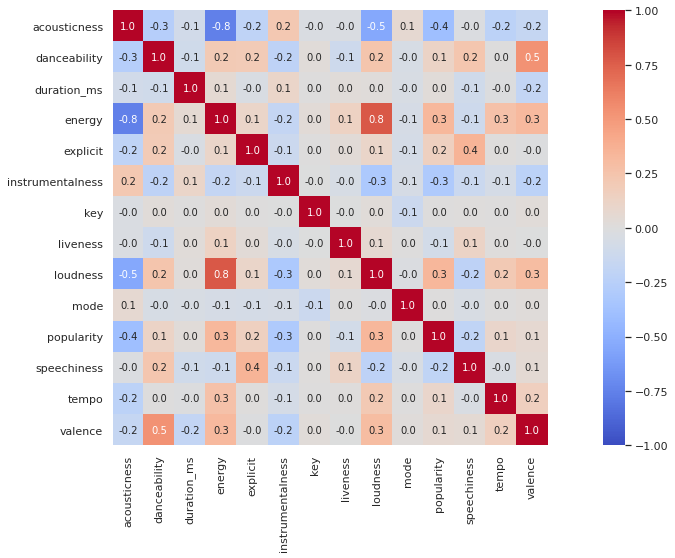

In [150]:
# correlation
corr = viz_df.corr()
# show visualization
plt.figure(figsize=(20,8))
sns.heatmap(corr, square=True, annot=True, fmt='.1f', cmap='coolwarm', vmax=1, vmin=-1)
plt.show()

We can see that loudness and energy are **positively high correlated**, while accousticness and energy are **negatively high correlated**.

Create dataframe for visualizing top 10 artists who have most songs from 1921 to 2020.

In [151]:
#top_10_artists with most songs
top_10_artists = pd.DataFrame({'Total songs':data_df['artists'].value_counts().head(10)})
top_10_artists

,Total songs
Tadeusz Dolega Mostowicz,1281
Эрнест Хемингуэй,1175
Эрих Мария Ремарк,1062
Francisco Canaro,951
Ignacio Corsini,624
Frank Sinatra,621
Elvis Presley,494
Bob Dylan,459
"Francisco Canaro, Charlo",456
Johnny Cash,456


then visualize it.

Text(0, 0.5, 'Total Song')

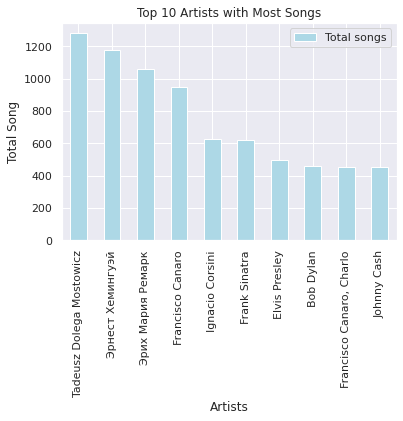

In [152]:
top_10_artists.plot.bar(color='lightblue')
plt.title('Top 10 Artists with Most Songs')
plt.xlabel('Artists')
plt.ylabel('Total Song')

Next, let's see top 20 artist with most popular song.

In [153]:
# top 20 artists with most popular song
# data_df[['artists','name','popularity']]
top_20_artists = data_df.groupby(['artists'])[['popularity']].sum().sort_values(by=['popularity'],ascending=False)[:20]
top_20_artists

,popularity
artists,
The Beatles,19110
Frank Sinatra,17434
Elvis Presley,16998
Fleetwood Mac,15927
The Rolling Stones,15817
Bob Dylan,14057
Led Zeppelin,12823
Taylor Swift,12697
Queen,12450


Text(0.5, 1.0, 'Top 20 artists with most popular song')

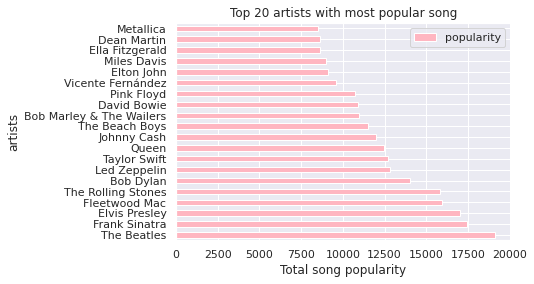

In [154]:
top_20_artists.plot.barh(color='lightpink')
plt.xlabel("Total song popularity")
plt.title("Top 20 artists with most popular song")

See one of the artist's popularity in years

In [155]:
taylorswift = data_df[data_df['artists']=='Taylor Swift']
taylorswift.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
17126,0.1110,Taylor Swift,0.668,201107,0.672,0,15DeqWWQB4dcEWzJg15VrN,0.0,2,0.3290,-4.931,1,Our Song,66,2006-10-24,0.0303,89.011,0.539,2006
17182,0.2880,Taylor Swift,0.621,203040,0.417,0,7zMcNqs55Mxer82bvZFkpg,0.0,10,0.1190,-6.941,1,Teardrops On My Guitar - Radio Single Remix,63,2006-10-24,0.0231,99.953,0.289,2006
17202,0.1730,Taylor Swift,0.658,173067,0.877,0,32mVHdy0bi1XKgr0ajsBlG,0.0,7,0.0962,-2.098,1,Picture To Burn,62,2006-10-24,0.0323,105.586,0.821,2006
17238,0.5750,Taylor Swift,0.580,232107,0.491,0,0Om9WAB5RS09L80DyOfTNa,0.0,0,0.1210,-6.462,1,Tim McGraw,61,2006-10-24,0.0251,76.009,0.425,2006
17250,0.0103,Taylor Swift,0.476,242200,0.777,0,16MVSD0mGI4RMQT83Qzm69,0.0,4,0.1960,-3.771,0,Should've Said No,61,2006-10-24,0.0289,167.964,0.472,2006


Text(0.5, 0, 'Year')

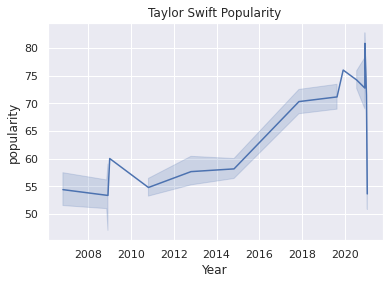

In [156]:
sns.set(style='darkgrid')
sns.lineplot(x='release_date', y='popularity', data=taylorswift)
plt.title("Taylor Swift Popularity")
plt.xlabel("Year")

# Feature Engineering

In [157]:
data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920-01-01,0.0936,149.976,0.6340,1920
1,0.643000,Screamin Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920-01-01,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


numerical column such as loudness and tempo are not yet normalize

In [158]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   acousticness      174389 non-null  float64       
 1   artists           174389 non-null  object        
 2   danceability      174389 non-null  float64       
 3   duration_ms       174389 non-null  int64         
 4   energy            174389 non-null  float64       
 5   explicit          174389 non-null  int64         
 6   id                174389 non-null  object        
 7   instrumentalness  174389 non-null  float64       
 8   key               174389 non-null  int64         
 9   liveness          174389 non-null  float64       
 10  loudness          174389 non-null  float64       
 11  mode              174389 non-null  int64         
 12  name              174389 non-null  object        
 13  popularity        174389 non-null  int64         
 14  rele

Normalize numerical data using below function, exclude the year column.

![Normalization Function](https://cdn.journaldev.com/wp-content/uploads/2020/10/Normalization.png)

source: https://www.journaldev.com/45109/normalize-data-in-python

In [159]:
def normalize_col(col):
    min_data = data_df[col].min()
    max_data = data_df[col].max()
    data_df[col] = (data_df[col]-min_data)/(max_data-min_data)

In [160]:
num_col = ['int64', 'float64']
num_df = data_df.select_dtypes(include=num_col).drop('year', axis=1)
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   danceability      174389 non-null  float64
 2   duration_ms       174389 non-null  int64  
 3   energy            174389 non-null  float64
 4   explicit          174389 non-null  int64  
 5   instrumentalness  174389 non-null  float64
 6   key               174389 non-null  int64  
 7   liveness          174389 non-null  float64
 8   loudness          174389 non-null  float64
 9   mode              174389 non-null  int64  
 10  popularity        174389 non-null  int64  
 11  speechiness       174389 non-null  float64
 12  tempo             174389 non-null  float64
 13  valence           174389 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 18.6 MB


In [161]:
for col in num_df.columns:
    normalize_col(col)

In [162]:
data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.994980,Mamie Smith,0.605263,0.030637,0.224,0.0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,0.454545,0.3790,0.741868,0.0,Keep A Song In Your Soul,0.12,1920-01-01,0.096395,0.615900,0.6340,1920
1,0.645582,Screamin Jay Hawkins,0.862348,0.027237,0.517,0.0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,0.454545,0.0809,0.825918,0.0,I Put A Spell On You,0.07,1920-01-05,0.054995,0.356823,0.9500,1920
2,0.996988,Mamie Smith,0.654858,0.029792,0.186,0.0,11m7laMUgmOKqI3oYzuhne,0.000018,0.000000,0.5190,0.750168,1.0,Golfing Papa,0.04,1920-01-01,0.179197,0.400810,0.6890,1920
3,0.000174,Oscar Velazquez,0.738866,0.078215,0.798,0.0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,0.181818,0.1280,0.825135,1.0,True House Music - Xavier Santos & Carlos Gomi...,0.17,1920-01-01,0.043769,0.525640,0.0422,1920
4,0.296185,Mixe,0.712551,0.030054,0.707,1.0,2hJjbsLCytGsnAHfdsLejp,0.000246,0.909091,0.4020,0.845102,0.0,Xuniverxe,0.02,1920-10-01,0.079094,0.501324,0.2990,1920


In [163]:
normalized_num_df = data_df.loc[:, [x for x in num_df.columns]]
normalized_num_df

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.994980,0.605263,0.030637,0.224,0.0,0.000522,0.454545,0.3790,0.741868,0.0,0.12,0.096395,0.615900,0.6340
1,0.645582,0.862348,0.027237,0.517,0.0,0.026400,0.454545,0.0809,0.825918,0.0,0.07,0.054995,0.356823,0.9500
2,0.996988,0.654858,0.029792,0.186,0.0,0.000018,0.000000,0.5190,0.750168,1.0,0.04,0.179197,0.400810,0.6890
3,0.000174,0.738866,0.078215,0.798,0.0,0.801000,0.181818,0.1280,0.825135,1.0,0.17,0.043769,0.525640,0.0422
4,0.296185,0.712551,0.030054,0.707,1.0,0.000246,0.909091,0.4020,0.845102,0.0,0.02,0.079094,0.501324,0.2990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009207,0.801619,0.026752,0.866,0.0,0.000060,0.545455,0.1780,0.859933,0.0,0.00,0.036663,0.517324,0.1860
174385,0.798193,0.434211,0.026209,0.211,0.0,0.000000,0.363636,0.1960,0.756949,1.0,0.00,0.037075,0.388942,0.2280
174386,0.809237,0.679150,0.039977,0.589,0.0,0.920000,0.363636,0.1130,0.745549,0.0,0.00,0.029042,0.443757,0.7140
174387,0.923695,0.467611,0.044824,0.240,1.0,0.000000,0.000000,0.1130,0.750497,1.0,0.69,0.038826,0.703549,0.3200


# Clustering Songs with Similar Genres

In [164]:
import datetime
import pytz

# time to take note of how long process on the cell below is running
tz = pytz.timezone('Asia/Jakarta')
datetime.datetime.now(tz)

datetime.datetime(2021, 1, 29, 15, 20, 49, 916814, tzinfo=<DstTzInfo 'Asia/Jakarta' WIB+7:00:00 STD>)

In [165]:
# CLuster using KMeans
from sklearn.cluster import KMeans
# Use elbow method to find the right number of clusters (genre).

km = KMeans()
k_range = range(1,200)  # k value
sse = [] # sse value for each k
for i in k_range:
    km = KMeans(n_clusters = i)
    # use only 1000 sample data to minimize computational load 
    km.fit(normalized_num_df.sample(1000))
    # calculating SSE(Sum of Squared Error)
    sse.append(km.inertia_) 
    


In [166]:
import datetime
import pytz

tz = pytz.timezone('Asia/Jakarta')
datetime.datetime.now(tz)

datetime.datetime(2021, 1, 29, 15, 23, 51, 963812, tzinfo=<DstTzInfo 'Asia/Jakarta' WIB+7:00:00 STD>)

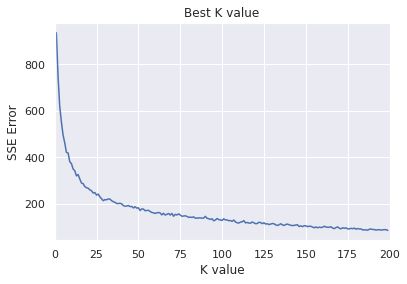

In [167]:
# visualize the result
plt.plot(k_range,sse)
plt.xlabel('K value')
plt.ylabel('SSE Error')
plt.title('Best K value')
plt.xlim([0,200])
plt.show()

Take the value of elbowing point for the right number of clusters. 20 seems good.

In [168]:
import datetime
import pytz

tz = pytz.timezone('Asia/Jakarta')
datetime.datetime.now(tz)

datetime.datetime(2021, 1, 29, 15, 23, 52, 326198, tzinfo=<DstTzInfo 'Asia/Jakarta' WIB+7:00:00 STD>)

Clustering the data with 20 cluster

In [169]:
km = KMeans(n_clusters=20)
predicted_genre = km.fit_predict(normalized_num_df)

In [170]:
import datetime
import pytz

tz = pytz.timezone('Asia/Jakarta')
datetime.datetime.now(tz)

datetime.datetime(2021, 1, 29, 15, 24, 22, 253909, tzinfo=<DstTzInfo 'Asia/Jakarta' WIB+7:00:00 STD>)

Add the predicted cluster result to dataframe.

In [171]:
data_df['predicted_genre'] = predicted_genre
data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,predicted_genre
0,0.994980,Mamie Smith,0.605263,0.030637,0.224,0.0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,0.454545,0.3790,0.741868,0.0,Keep A Song In Your Soul,0.12,1920-01-01,0.096395,0.615900,0.6340,1920,4
1,0.645582,Screamin Jay Hawkins,0.862348,0.027237,0.517,0.0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,0.454545,0.0809,0.825918,0.0,I Put A Spell On You,0.07,1920-01-05,0.054995,0.356823,0.9500,1920,4
2,0.996988,Mamie Smith,0.654858,0.029792,0.186,0.0,11m7laMUgmOKqI3oYzuhne,0.000018,0.000000,0.5190,0.750168,1.0,Golfing Papa,0.04,1920-01-01,0.179197,0.400810,0.6890,1920,18
3,0.000174,Oscar Velazquez,0.738866,0.078215,0.798,0.0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,0.181818,0.1280,0.825135,1.0,True House Music - Xavier Santos & Carlos Gomi...,0.17,1920-01-01,0.043769,0.525640,0.0422,1920,2
4,0.296185,Mixe,0.712551,0.030054,0.707,1.0,2hJjbsLCytGsnAHfdsLejp,0.000246,0.909091,0.4020,0.845102,0.0,Xuniverxe,0.02,1920-10-01,0.079094,0.501324,0.2990,1920,14


# Song Recommender

In [172]:
num_df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

In [173]:
from tqdm import tqdm

Create class for recommend song using manhattan distance. User can ask for recommendation by inserting song name and artist to the parameter. If the song with the same name(title) and artist has many version, it will use the first version.

In [174]:
class SongRecommender():
    def __init__(self, rec_data):
        # set data for the class to work with 
        self.rec_data_ = rec_data
    
    # function for changing the data to work with
    def change_data(self, rec_data):
        self.rec_data_ = rec_data

    # to check if we get the right song 
    def get_song(self, song_name, artists_name):
        song = self.rec_data_[((self.rec_data_.name.str.lower() == song_name.lower()) & (self.rec_data_.artists.str.lower() == artists_name.lower()))].head(1)          
        return song

    # function to get reccomendation songs, the default amount of result songs are 5
    def get_recom(self, song_name, artists_name, amount=5):
        distances = []
        # choosing the data for our song with the keyword of song name and artist 
        song = self.rec_data_[((self.rec_data_.name.str.lower() == song_name.lower()) & (self.rec_data_.artists.str.lower() == artists_name.lower()))].head(1).values[0]  
        # exclude song that we search from the result data
        res_data = self.rec_data_[(self.rec_data_.name.str.lower() != song_name.lower()) & (self.rec_data_.artists.str.lower() != artists_name.lower())]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                # indices of non-numerical columns
                if not col in [1, 6, 12, 14, 18]:
                    # calculating the manhattan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
        # sorting result data to be ascending by 'distance' feature
        res_data = res_data.sort_values('distance')
        columns = ['artists', 'name']
        return res_data[columns][:amount]

In [175]:
recommender = SongRecommender(data_df)

Let's test it. First check if the song in the parameter is true.

In [176]:
recommender.get_song('seven', 'Taylor Swift')

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,predicted_genre
110006,0.903614,Taylor Swift,0.603239,0.038244,0.488,0.0,6KJqZcs9XDgVck7Lg9QOTC,0.000027,0.363636,0.091,0.770981,1.0,seven,0.73,2020-07-24,0.028218,0.389829,0.415,2020,1


Then get recommendation.

In [177]:
recommender.get_recom('seven', 'Taylor Swift')

100%|██████████| 174177/174177 [00:17<00:00, 9969.51it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,artists,name
18560,The Paper Kites,Bloom - Bonus Track
18042,The Steeldrivers,Where Rainbows Never Die
14177,Paula Abdul,Rush Rush
37472,Tyler Childers,Coal
93284,Daniel Caesar,We Find Love


Let's test with common song name that owned by many artists.

In [178]:
data_df[data_df['name']=="One"]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,predicted_genre
12454,0.151606,Three Dog Night,0.571862,0.033354,0.419,0.0,4KkGTqja19AHqItq3XBV3C,0.000022,0.909091,0.1130,0.730092,0.0,One,0.47,1982-01-01,0.040268,0.509090,0.4560,1982,16
14098,0.245984,U2,0.396761,0.050859,0.534,0.0,3G69vJMWsX6ZohTykad2AU,0.001040,0.000000,0.1550,0.801926,1.0,One,0.76,1991-11-18,0.038002,0.744558,0.3250,1991,6
22817,0.806225,Mushy Peas,0.415992,0.040300,0.354,0.0,2fM7p3skZQrnkEw5v542ru,0.001150,0.181818,0.0782,0.763386,1.0,One,0.00,1937-01-17,0.042945,0.607223,0.0969,1937,1
34792,0.000021,Creed,0.563765,0.055799,0.933,0.0,35GwlKlVXgFCMF5uTp5r7P,0.000009,0.545455,0.1170,0.881685,0.0,One,0.54,1997-01-01,0.036045,0.455617,0.4350,1997,0
47939,0.949799,Harry Nilsson,0.460526,0.031307,0.063,0.0,7Ci3Yc9H2YliGFc1czyqI1,0.000131,0.000000,0.1000,0.607768,0.0,One,0.39,1968-07-01,0.039856,0.514942,0.2080,1968,8
48506,0.936747,Harry Nilsson,0.459514,0.025069,0.163,0.0,6n6NlFLLloIFPdVhJScHBv,0.110000,0.000000,0.1570,0.685052,0.0,One,0.42,1971-06-01,0.045005,0.513135,0.2520,1971,8
71130,0.410643,Three Dog Night,0.352227,0.033749,0.457,0.0,0TGKBG5wK1ZGSACf6uso3H,0.000000,0.000000,0.0950,0.770840,0.0,One,0.52,1993-12-07,0.044181,0.761916,0.4490,1993,0
90080,0.616466,Johnny Cash,0.520243,0.042549,0.497,0.0,0Vnw5XZAHDiTSG1x29yox5,0.004180,0.000000,0.3870,0.812059,1.0,One,0.44,2000-01-01,0.027909,0.385352,0.4170,2000,1
119683,0.364458,Ahmad Jamal,0.595142,0.081281,0.377,0.0,0Q7N3ZAO7Iu1mJfgaQtMAN,0.845000,0.818182,0.1390,0.623929,0.0,One,0.32,1985-07-17,0.035839,0.396896,0.6360,1985,7
122426,0.851406,Aimee Mann,0.619433,0.031634,0.166,0.0,5e7OZ8PyDJYQdGAiidCPad,0.001390,0.363636,0.1250,0.720789,0.0,One,0.44,1999-12-07,0.042225,0.511004,0.3560,1999,8


In [179]:
recommender.get_song("one","U2")

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,predicted_genre
14098,0.245984,U2,0.396761,0.050859,0.534,0.0,3G69vJMWsX6ZohTykad2AU,0.00104,0.0,0.155,0.801926,1.0,One,0.76,1991-11-18,0.038002,0.744558,0.325,1991,6


In [180]:
recommender.get_recom("one","U2")

100%|██████████| 174168/174168 [00:18<00:00, 9512.13it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,artists,name
18106,Hunter Hayes,Wanted
92900,Young the Giant,Mind Over Matter
13875,Scorpions,Wind Of Change
14731,Tim McGraw,Don't Take The Girl
36266,Augustana,Boston


Reference:
* https://www.kaggle.com/darkstardream/spotify-analysis-starman
* https://www.kaggle.com/artempozdniakov/spotify-data-eda-and-music-recommendation